<a href="https://colab.research.google.com/github/AbhinavDwivediii/DL_LAB_500121151_ABHINAV_DWIVEDI/blob/main/DL_Exp12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import zipfile
import os

zip_path = '/content/img_align_celeba.zip'
extract_path = '/content/'

if not os.path.exists(os.path.join(extract_path, 'img_align_celeba')):
    print(f"Unzipping {zip_path}...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Unzipping complete.")
else:
    print("'img_align_celeba' directory already exists. Skipping unzipping.")

Unzipping /content/img_align_celeba.zip...
Unzipping complete.


Using device: cpu
Loading dataset...
Scanning image directory...
Found 10000 images
Dataset size: 10000 images

Creating autoencoder model...


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(



Model Architecture:
Latent Dimension: 128
Total Parameters: 2,432,835
Trainable Parameters: 2,432,835

Starting training...


Epoch 1/20:   0%|          | 0/79 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Epoch 1/20: 100%|██████████| 79/79 [01:42<00:00,  1.30s/it, loss=0.0343]


Epoch [1/20], Average Loss: 0.061171


Epoch 2/20: 100%|██████████| 79/79 [01:42<00:00,  1.29s/it, loss=0.02]


Epoch [2/20], Average Loss: 0.024711


Epoch 3/20: 100%|██████████| 79/79 [01:42<00:00,  1.30s/it, loss=0.0221]


Epoch [3/20], Average Loss: 0.019549


Epoch 4/20: 100%|██████████| 79/79 [01:43<00:00,  1.31s/it, loss=0.0182]


Epoch [4/20], Average Loss: 0.016181


Epoch 5/20: 100%|██████████| 79/79 [01:43<00:00,  1.31s/it, loss=0.0135]


Epoch [5/20], Average Loss: 0.014001


Epoch 6/20: 100%|██████████| 79/79 [01:42<00:00,  1.30s/it, loss=0.0125]


Epoch [6/20], Average Loss: 0.012442


Epoch 7/20: 100%|██████████| 79/79 [01:42<00:00,  1.29s/it, loss=0.0108]


Epoch [7/20], Average Loss: 0.011517


Epoch 8/20: 100%|██████████| 79/79 [01:42<00:00,  1.30s/it, loss=0.0105]


Epoch [8/20], Average Loss: 0.010967


Epoch 9/20: 100%|██████████| 79/79 [01:43<00:00,  1.30s/it, loss=0.00917]


Epoch [9/20], Average Loss: 0.010239


Epoch 10/20: 100%|██████████| 79/79 [01:43<00:00,  1.30s/it, loss=0.00932]


Epoch [10/20], Average Loss: 0.009800


Epoch 11/20: 100%|██████████| 79/79 [01:42<00:00,  1.30s/it, loss=0.00847]


Epoch [11/20], Average Loss: 0.009377


Epoch 12/20: 100%|██████████| 79/79 [01:42<00:00,  1.30s/it, loss=0.00799]


Epoch [12/20], Average Loss: 0.008930


Epoch 13/20: 100%|██████████| 79/79 [01:43<00:00,  1.31s/it, loss=0.00869]


Epoch [13/20], Average Loss: 0.008751


Epoch 14/20: 100%|██████████| 79/79 [01:44<00:00,  1.32s/it, loss=0.00909]


Epoch [14/20], Average Loss: 0.008345


Epoch 15/20: 100%|██████████| 79/79 [01:42<00:00,  1.30s/it, loss=0.00815]


Epoch [15/20], Average Loss: 0.008086


Epoch 16/20: 100%|██████████| 79/79 [01:43<00:00,  1.30s/it, loss=0.0105]


Epoch [16/20], Average Loss: 0.007933


Epoch 17/20: 100%|██████████| 79/79 [01:42<00:00,  1.30s/it, loss=0.0083]


Epoch [17/20], Average Loss: 0.007627


Epoch 18/20: 100%|██████████| 79/79 [01:43<00:00,  1.31s/it, loss=0.00838]


Epoch [18/20], Average Loss: 0.007425


Epoch 19/20: 100%|██████████| 79/79 [01:43<00:00,  1.31s/it, loss=0.00836]


Epoch [19/20], Average Loss: 0.007262


Epoch 20/20: 100%|██████████| 79/79 [01:42<00:00,  1.30s/it, loss=0.00625]


Epoch [20/20], Average Loss: 0.007110

Model saved as 'autoencoder_celeba.pth'

Generating visualizations...


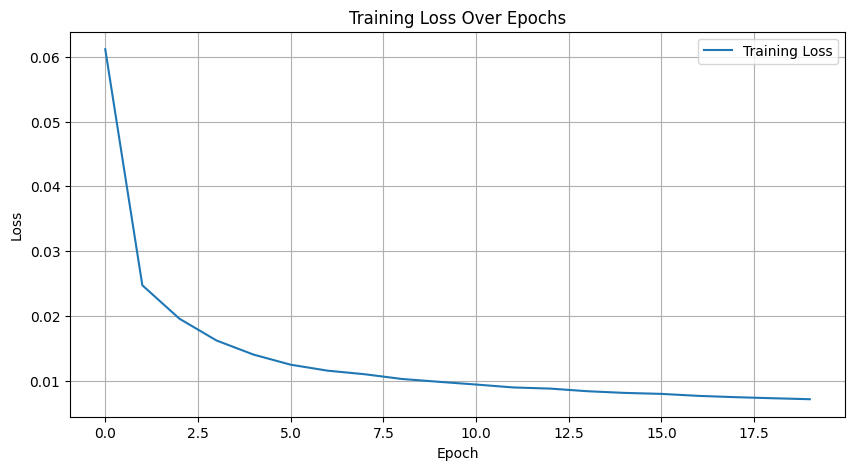

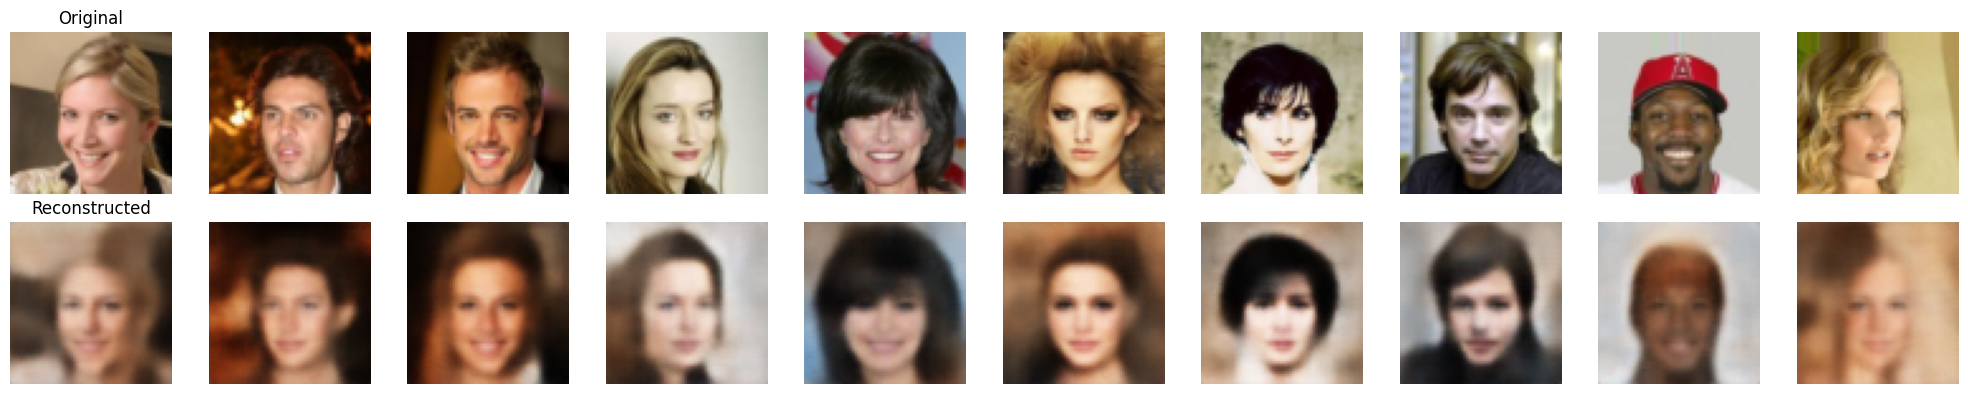

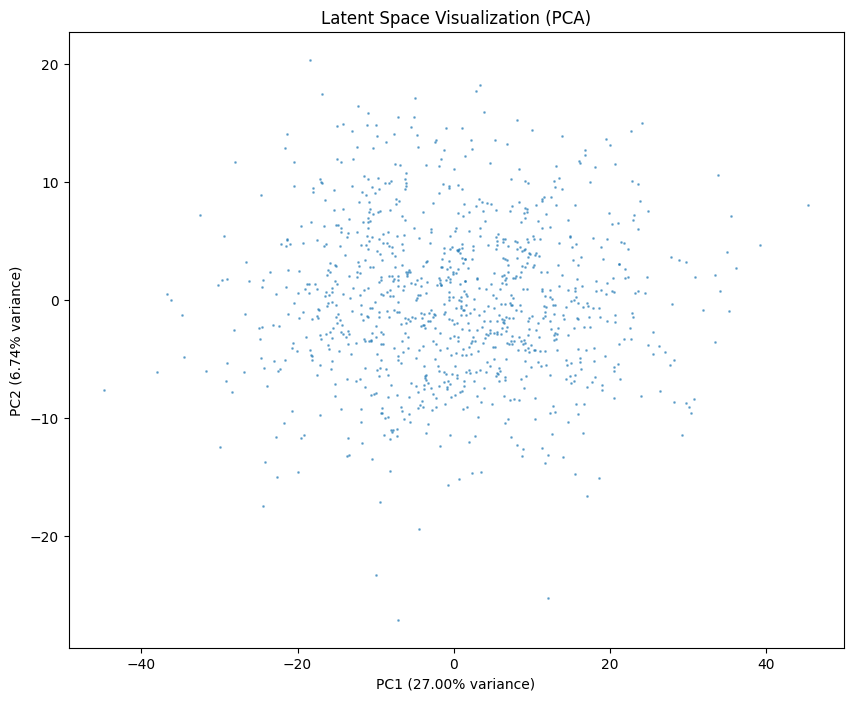

Total variance explained by 2 components: 33.74%

Training complete! Check the generated images.


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import zipfile # Import zipfile for unzipping

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# ==================== DATASET CLASS ====================
class CelebADataset(Dataset):
    def __init__(self, img_dir, transform=None, limit=None):
        """
        Args:
            img_dir: Directory with all the images
            transform: Optional transform to be applied on images
            limit: Optional limit on number of images to use
        """
        self.img_dir = img_dir
        self.transform = transform
        # Filter out non-image files and use faster list comprehension
        print("Scanning image directory...")
        all_files = os.listdir(img_dir)
        self.image_files = [f for f in all_files if f.endswith(('.jpg', '.jpeg', '.png'))]

        if limit:
            self.image_files = self.image_files[:limit]

        print(f"Found {len(self.image_files)} images")

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.image_files[idx])
        # Use faster loading without sorting
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image

# ==================== AUTOENCODER MODEL ====================
class Autoencoder(nn.Module):
    def __init__(self, latent_dim=128):
        super(Autoencoder, self).__init__()

        # Encoder: Convolutional layers for feature extraction
        self.encoder = nn.Sequential(
            # Input: 3 x 64 x 64
            nn.Conv2d(3, 32, kernel_size=4, stride=2, padding=1),  # 32 x 32 x 32
            nn.ReLU(True),
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1), # 64 x 16 x 16
            nn.ReLU(True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1), # 128 x 8 x 8
            nn.ReLU(True),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1), # 256 x 4 x 4
            nn.ReLU(True),
            nn.Flatten(),  # 256 * 4 * 4 = 4096
            nn.Linear(256 * 4 * 4, latent_dim)  # Compressed representation
        )

        # Decoder: Transposed convolutions for reconstruction
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256 * 4 * 4),
            nn.ReLU(True),
            nn.Unflatten(1, (256, 4, 4)),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1), # 128 x 8 x 8
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),  # 64 x 16 x 16
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),   # 32 x 32 x 32
            nn.ReLU(True),
            nn.ConvTranspose2d(32, 3, kernel_size=4, stride=2, padding=1),    # 3 x 64 x 64
            nn.Sigmoid()  # Output in range [0, 1]
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def encode(self, x):
        return self.encoder(x)

# ==================== TRAINING FUNCTION ====================
def train_autoencoder(model, train_loader, num_epochs, learning_rate=0.001):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_losses = []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0

        progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}')
        for batch_idx, images in enumerate(progress_bar):
            images = images.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, images)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            progress_bar.set_postfix({'loss': loss.item()})

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss:.6f}')

    return train_losses

# ==================== VISUALIZATION FUNCTIONS ====================
def visualize_reconstruction(model, data_loader, num_images=10):
    model.eval()

    # Get a batch of images
    images = next(iter(data_loader))[:num_images].to(device)

    with torch.no_grad():
        reconstructed = model(images)

    # Move to CPU and convert to numpy
    images = images.cpu().numpy()
    reconstructed = reconstructed.cpu().numpy()

    # Plot original and reconstructed images
    fig, axes = plt.subplots(2, num_images, figsize=(20, 4))

    for i in range(num_images):
        # Original images
        axes[0, i].imshow(np.transpose(images[i], (1, 2, 0)))
        axes[0, i].axis('off')
        if i == 0:
            axes[0, i].set_title('Original', fontsize=12)

        # Reconstructed images
        axes[1, i].imshow(np.transpose(reconstructed[i], (1, 2, 0)))
        axes[1, i].axis('off')
        if i == 0:
            axes[1, i].set_title('Reconstructed', fontsize=12)

    plt.tight_layout()
    plt.savefig('reconstruction_results.png', dpi=150, bbox_inches='tight')
    plt.show()

def plot_training_loss(train_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Epochs')
    plt.legend()
    plt.grid(True)
    plt.savefig('training_loss.png', dpi=150, bbox_inches='tight')
    plt.show()

def visualize_latent_space(model, data_loader, num_samples=1000):
    """Visualize the latent space representations using PCA"""
    model.eval()
    latent_vectors = []

    with torch.no_grad():
        for i, images in enumerate(data_loader):
            if i * data_loader.batch_size >= num_samples:
                break
            images = images.to(device)
            encoded = model.encode(images)
            latent_vectors.append(encoded.cpu().numpy())

    latent_vectors = np.vstack(latent_vectors)[:num_samples]

    # Apply PCA for 2D visualization
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    latent_2d = pca.fit_transform(latent_vectors)

    plt.figure(figsize=(10, 8))
    plt.scatter(latent_2d[:, 0], latent_2d[:, 1], alpha=0.5, s=1)
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    plt.title('Latent Space Visualization (PCA)')
    # Removed colorbar as it was missing 'c' argument and causing an error with current usage
    plt.savefig('latent_space.png', dpi=150, bbox_inches='tight')
    plt.show()

    print(f"Total variance explained by 2 components: {sum(pca.explained_variance_ratio_):.2%}")

# ==================== MAIN EXECUTION ====================
if __name__ == "__main__":
    # Configuration
    IMG_DIR = 'img_align_celeba'  # Update this path
    ZIP_PATH = 'img_align_celeba.zip' # Path to the zip file
    BATCH_SIZE = 128
    NUM_EPOCHS = 20
    LEARNING_RATE = 0.001
    LATENT_DIM = 128
    NUM_IMAGES = 10000  # Use subset for faster training, set to None for full dataset

    # Unzip the dataset if the directory does not exist
    if not os.path.exists(IMG_DIR) and os.path.exists(ZIP_PATH):
        print(f"Unzipping {ZIP_PATH}...")
        with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
            zip_ref.extractall('.')
        print("Unzipping complete.")

    # Data transforms
    transform = transforms.Compose([
        transforms.Resize(64),
        transforms.CenterCrop(64),
        transforms.ToTensor(),
    ])

    # Load dataset
    print("Loading dataset...")
    dataset = CelebADataset(IMG_DIR, transform=transform, limit=NUM_IMAGES)
    train_loader = DataLoader(
        dataset,
        batch_size=BATCH_SIZE,
        shuffle=True,
        num_workers=4,  # Increased workers
        pin_memory=True,  # Faster GPU transfer
        persistent_workers=True  # Keep workers alive
    )
    print(f"Dataset size: {len(dataset)} images")

    # Create model
    print("\nCreating autoencoder model...")
    model = Autoencoder(latent_dim=LATENT_DIM).to(device)

    # Print model architecture
    print(f"\nModel Architecture:")
    print(f"Latent Dimension: {LATENT_DIM}")
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Total Parameters: {total_params:,}")
    print(f"Trainable Parameters: {trainable_params:,}")

    # Train the model
    print("\nStarting training...")
    train_losses = train_autoencoder(model, train_loader, NUM_EPOCHS, LEARNING_RATE)

    # Save the model
    torch.save(model.state_dict(), 'autoencoder_celeba.pth')
    print("\nModel saved as 'autoencoder_celeba.pth'")

    # Visualizations
    print("\nGenerating visualizations...")
    plot_training_loss(train_losses)
    visualize_reconstruction(model, train_loader, num_images=10)
    visualize_latent_space(model, train_loader, num_samples=1000)

    print("\nTraining complete! Check the generated images.")